In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-20000-movies-dataset/Movies_data.csv


# EDA

In [2]:
movies=pd.read_csv("/kaggle/input/tmdb-20000-movies-dataset/Movies_data.csv")
movies

,Unnamed: 0,id,title,original_language,release_date,vote_average,popularity,adult
0,0,238,The Godfather,en,1972-03-14,8.7,114.574,False
1,1,278,The Shawshank Redemption,en,1994-09-23,8.7,91.998,False
2,2,240,The Godfather Part II,en,1974-12-20,8.6,61.490,False
3,3,19404,Dilwale Dulhania Le Jayenge,hi,1995-10-20,8.6,28.989,False
4,4,424,Schindler's List,en,1993-12-15,8.6,43.764,False
...,...,...,...,...,...,...,...,...
19995,19995,384521,The Cloverfield Paradox,en,2018-02-04,5.6,17.073,False
19996,19996,14361,Captain Ron,en,1992-09-18,5.6,11.060,False
19997,19997,11637,Are We There Yet?,en,2005-01-20,5.6,15.591,False
19998,19998,10956,Joe Dirt,en,2001-04-10,5.6,15.664,False


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

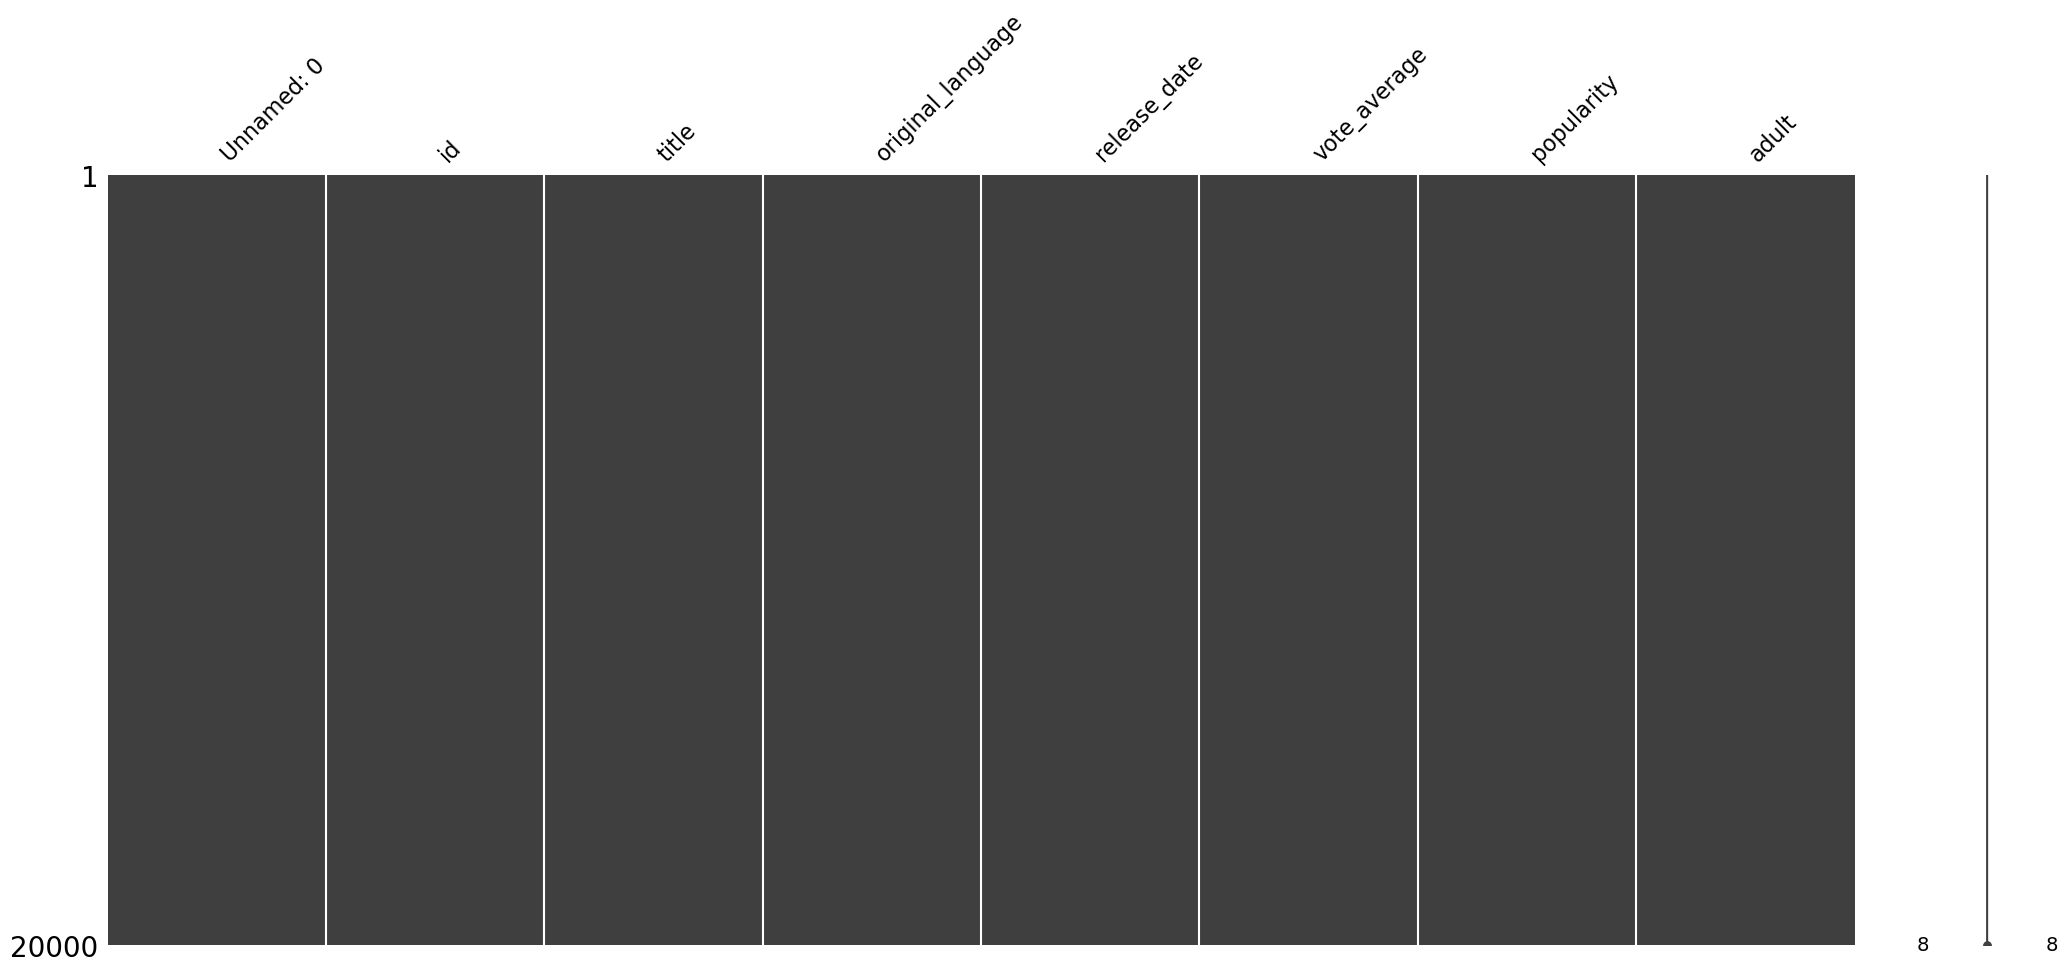

In [3]:
import missingno as msno
msno.matrix(movies)   # checking for missing values

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the DataFrame
print(movies.info())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(movies.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         20000 non-null  int64  
 1   id                 20000 non-null  int64  
 2   title              20000 non-null  object 
 3   original_language  20000 non-null  object 
 4   release_date       20000 non-null  object 
 5   vote_average       20000 non-null  float64
 6   popularity         20000 non-null  float64
 7   adult              20000 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 1.1+ MB
None

Descriptive Statistics:
         Unnamed: 0            id  vote_average    popularity
count  20000.000000  2.000000e+04  20000.000000  20000.000000
mean    9999.500000  1.823818e+05      6.763050     25.164758
std     5773.647028  2.383994e+05      0.646887     75.469478
min        0.000000  2.000000e+00      5.600000      0.600000
2


Language Distribution:
en    15140
fr     1390
it      866
ja      642
es      448
de      228
ko      202
zh      146
cn      140
ru      110
hi      106
pt       94
sv       80
da       72
no       54
pl       44
nl       32
tr       28
th       24
fa       18
fi       16
hu       16
id       14
cs        8
ar        8
is        8
el        8
uk        6
sr        6
te        6
xx        4
eu        4
bn        4
ro        4
sh        2
bs        2
gl        2
hy        2
et        2
ml        2
la        2
tn        2
nb        2
he        2
mk        2
km        2
Name: original_language, dtype: int64


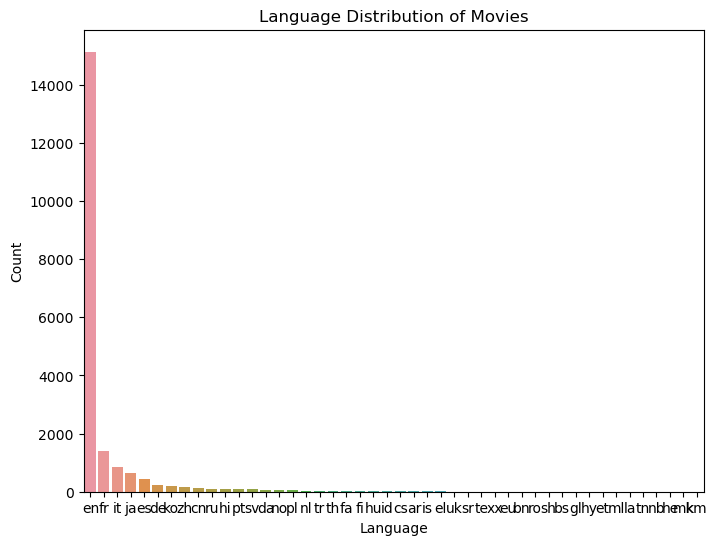

In [5]:
# Language Distribution
print("\nLanguage Distribution:")
language_counts = movies['original_language'].value_counts()
print(language_counts)

# Data Visualization: Bar Chart for Language Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Language Distribution of Movies')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

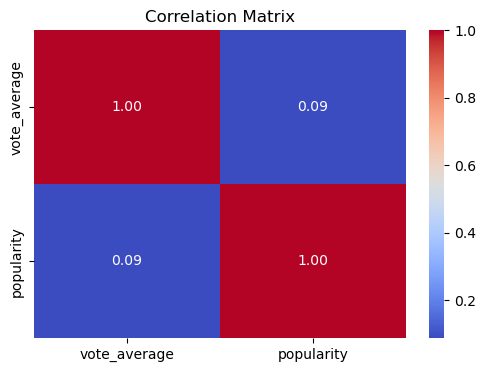


High-Rated Movies (vote_average > 8.5):
       Unnamed: 0      id                                title  \
0               0     238                        The Godfather   
1               1     278             The Shawshank Redemption   
2               2     240                The Godfather Part II   
3               3   19404          Dilwale Dulhania Le Jayenge   
4               4     424                     Schindler's List   
5               5  569094  Spider-Man: Across the Spider-Verse   
10000       10000     238                        The Godfather   
10001       10001     278             The Shawshank Redemption   
10002       10002     240                The Godfather Part II   
10003       10003   19404          Dilwale Dulhania Le Jayenge   
10004       10004     424                     Schindler's List   
10005       10005  569094  Spider-Man: Across the Spider-Verse   

      original_language release_date  vote_average  popularity  adult  
0                    en   19

In [6]:
# Correlation Analysis
correlation_matrix = movies[['vote_average', 'popularity']].corr()

# Data Visualization: Heatmap for Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Filtering: Get movies with a vote_average greater than 8.5
high_rated_movies = movies[movies['vote_average'] > 8.5]
print("\nHigh-Rated Movies (vote_average > 8.5):")
print(high_rated_movies)

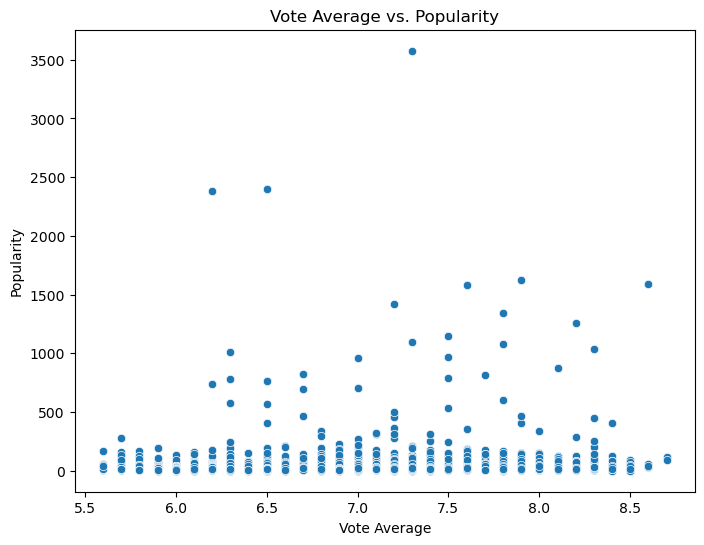

In [7]:
# Scatter Plot: Vote Average vs. Popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vote_average', y='popularity', data=movies)
plt.title('Vote Average vs. Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()

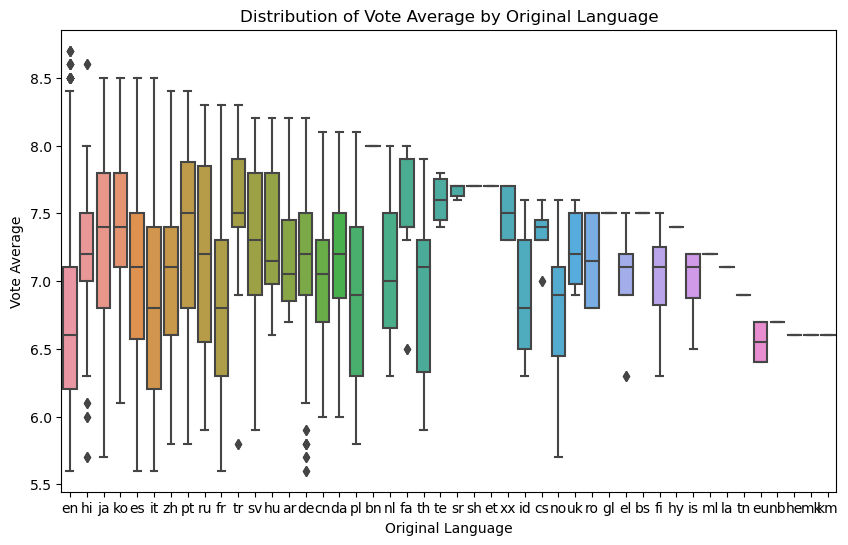

In [8]:
# Box Plot: Distribution of Vote Average by Original Language
plt.figure(figsize=(10, 6))
sns.boxplot(x='original_language', y='vote_average', data=movies)
plt.title('Distribution of Vote Average by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Vote Average')
plt.show()

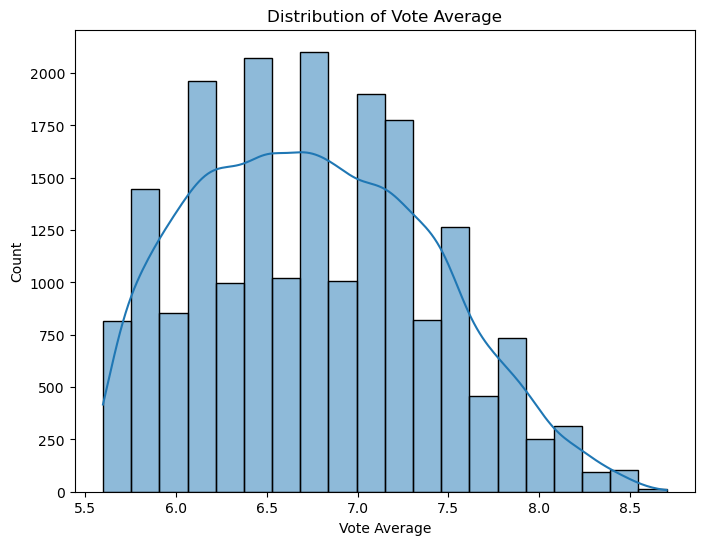

In [9]:
# Histogram: Distribution of Vote Average
plt.figure(figsize=(8, 6))
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()

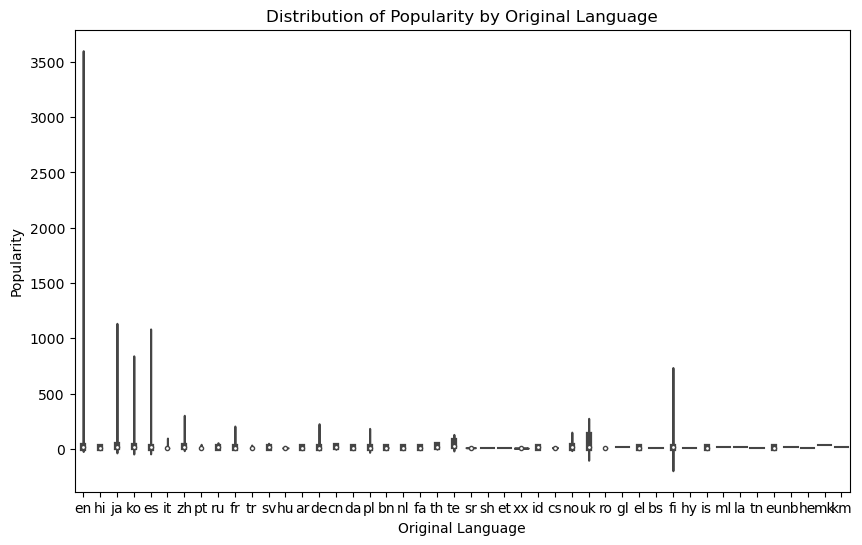

In [10]:
# Violin Plot: Distribution of Popularity by Original Language
plt.figure(figsize=(10, 6))
sns.violinplot(x='original_language', y='popularity', data=movies)
plt.title('Distribution of Popularity by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


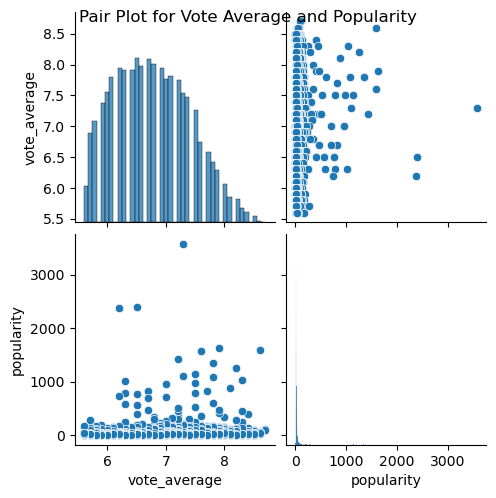

In [11]:
# Pair Plot: Scatter Plots and Histograms for Multiple Numerical Variables
sns.pairplot(movies[['vote_average', 'popularity']])
plt.suptitle('Pair Plot for Vote Average and Popularity')
plt.show()

Explained Variance Ratio: [0.54374232 0.45625768]


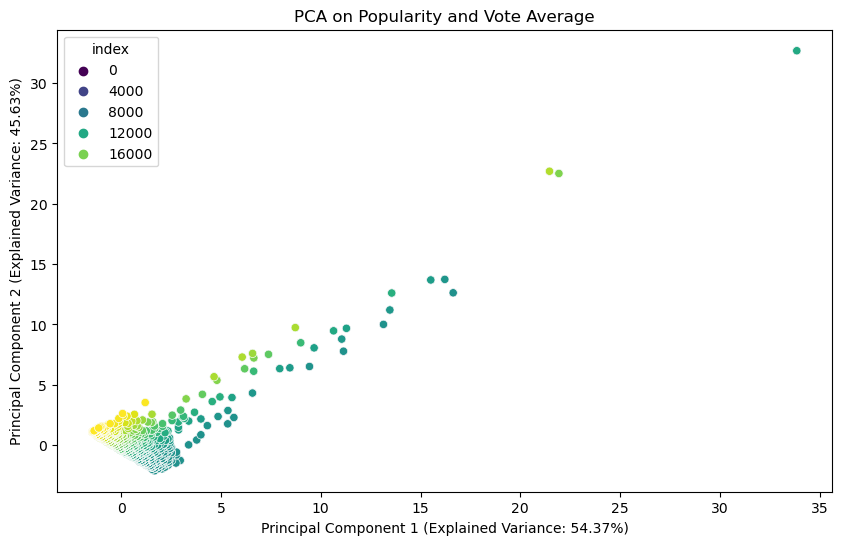

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting the 'popularity' and 'vote_average' columns for PCA
selected_columns = ['popularity', 'vote_average']
data_for_pca = movies[selected_columns]

# Standardize the data (mean=0, std=1) before applying PCA
scaler = StandardScaler()
data_for_pca_scaled = scaler.fit_transform(data_for_pca)

# Create the PCA object and fit_transform the scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca_scaled)

# Explained variance ratio of the principal components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Dataframe to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Adding back the original index from the 'movies' DataFrame
pca_df['index'] = movies.index

# Scatter plot to visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df, hue='index', palette='viridis')
plt.title('PCA on Popularity and Vote Average')
plt.xlabel('Principal Component 1 (Explained Variance: {:.2f}%)'.format(explained_variance_ratio[0] * 100))
plt.ylabel('Principal Component 2 (Explained Variance: {:.2f}%)'.format(explained_variance_ratio[1] * 100))
plt.show()

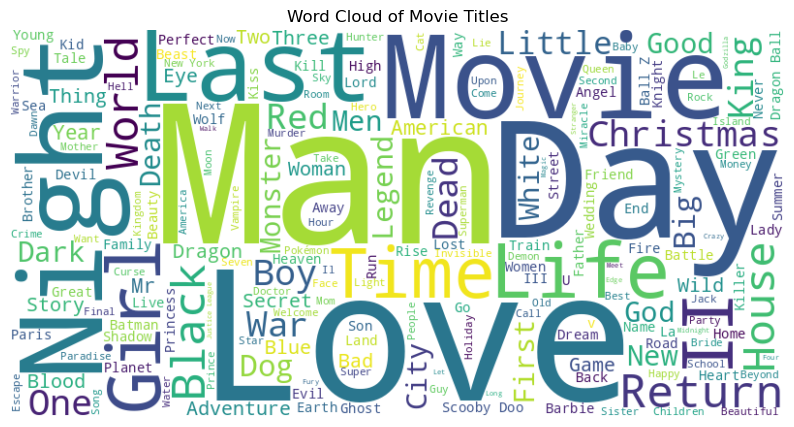

In [13]:
from wordcloud import WordCloud

# Combine all movie titles into a single string
titles_text = " ".join(movies['title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

In [14]:
movies['original_language'].unique()

array(['en', 'hi', 'ja', 'ko', 'es', 'it', 'zh', 'pt', 'ru', 'fr', 'tr',
       'sv', 'hu', 'ar', 'de', 'cn', 'da', 'pl', 'bn', 'nl', 'fa', 'th',
       'te', 'sr', 'sh', 'et', 'xx', 'id', 'cs', 'no', 'uk', 'ro', 'gl',
       'el', 'bs', 'fi', 'hy', 'is', 'ml', 'la', 'tn', 'eu', 'nb', 'he',
       'mk', 'km'], dtype=object)

In [15]:
lang_to_country = {
    'en': 'United States',
    'hi': 'India',
    'ja': 'Japan',
    'ko': 'South Korea',
    'es': 'Spain',
    'it': 'Italy',
    'zh': 'China',
    'pt': 'Portugal',
    'ru': 'Russia',
    'fr': 'France',
    'tr': 'Turkey',
    'sv': 'Sweden',
    'hu': 'Hungary',
    'ar': 'Argentina',
    'de': 'Germany',
    'cn': 'China',  # Assuming this is Chinese (Simplified) based on the code 'cn'
    'da': 'Denmark',
    'pl': 'Poland',
    'bn': 'Bangladesh',
    'nl': 'Netherlands',
    'fa': 'Iran',
    'th': 'Thailand',
    'te': 'India',  # Assuming this is Telugu based on the code 'te'
    'sr': 'Serbia',
    'sh': 'Serbia',  # Assuming this is Serbo-Croatian based on the code 'sh'
    'et': 'Ethiopia',
    'xx': 'Unknown',  # 'xx' is not a valid ISO language code
    'id': 'Indonesia',
    'cs': 'Czech Republic',
    'no': 'Norway',
    'uk': 'Ukraine',
    'ro': 'Romania',
    'gl': 'Galicia',  # Assuming this is Galician based on the code 'gl'
    'el': 'Greece',
    'bs': 'Bosnia and Herzegovina',
    'fi': 'Finland',
    'hy': 'Armenia',
    'is': 'Iceland',
    'ml': 'India',  # Assuming this is Malayalam based on the code 'ml'
    'la': 'Latin',
    'tn': 'Tunisia',
    'eu': 'Basque Country',
    'nb': 'Norway',  # Assuming this is Norwegian Bokmål based on the code 'nb'
    'he': 'Israel',
    'mk': 'North Macedonia',
    'km': 'Cambodia',
}

/tmp/ipykernel_21/2417785183.py:32: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


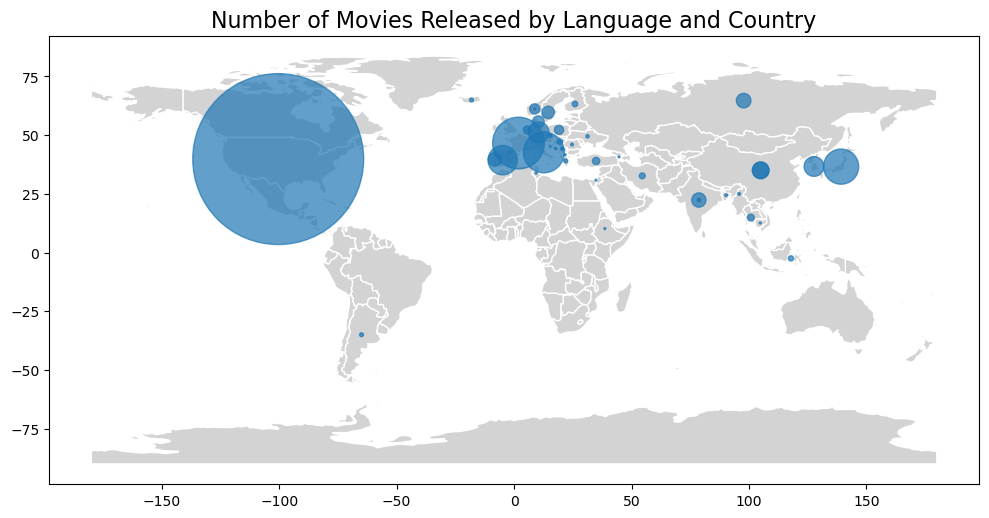

In [16]:
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# We will create the mapping dictionary
language_to_country = lang_to_country

# Create a mapping DataFrame
language_country_df = pd.DataFrame({'original_language': list(language_to_country.keys()),
                                    'country': list(language_to_country.values())})

# Group the movies DataFrame by 'original_language' to get movie counts per language
movie_counts = movies.groupby('original_language')['id'].count().reset_index()

# Merge the movie_counts DataFrame with language_country_df to get latitude and longitude for each country
merged_df = pd.merge(movie_counts, language_country_df, on='original_language')

# Use Nominatim geocoder to get latitude and longitude for each country
geolocator = Nominatim(user_agent="movie_map")
merged_df['location'] = merged_df['country'].apply(geolocator.geocode)

# Extract latitude and longitude from the location object
merged_df['latitude'] = merged_df['location'].apply(lambda loc: loc.latitude if loc else None)
merged_df['longitude'] = merged_df['location'].apply(lambda loc: loc.longitude if loc else None)

# Create a GeoDataFrame with the geographical data
geometry = gpd.points_from_xy(merged_df['longitude'], merged_df['latitude'])
gdf = gpd.GeoDataFrame(merged_df, geometry=geometry)

# Create a world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the number of movies released by language and country on the map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color='lightgray', edgecolor='white')

gdf.plot(ax=ax, markersize=merged_df['id'], alpha=0.7, legend=True)

ax.set_title('Number of Movies Released by Language and Country', fontsize=16)
plt.show()


Adult Movies DataFrame:
Empty DataFrame
Columns: [Unnamed: 0, id, title, original_language, release_date, vote_average, popularity, adult, release_year]
Index: []
Non-Adult Movies DataFrame:
       Unnamed: 0      id                        title original_language  \
0               0     238                The Godfather                en   
1               1     278     The Shawshank Redemption                en   
2               2     240        The Godfather Part II                en   
3               3   19404  Dilwale Dulhania Le Jayenge                hi   
4               4     424             Schindler's List                en   
...           ...     ...                          ...               ...   
19995       19995  384521      The Cloverfield Paradox                en   
19996       19996   14361                  Captain Ron                en   
19997       19997   11637            Are We There Yet?                en   
19998       19998   10956                     Joe

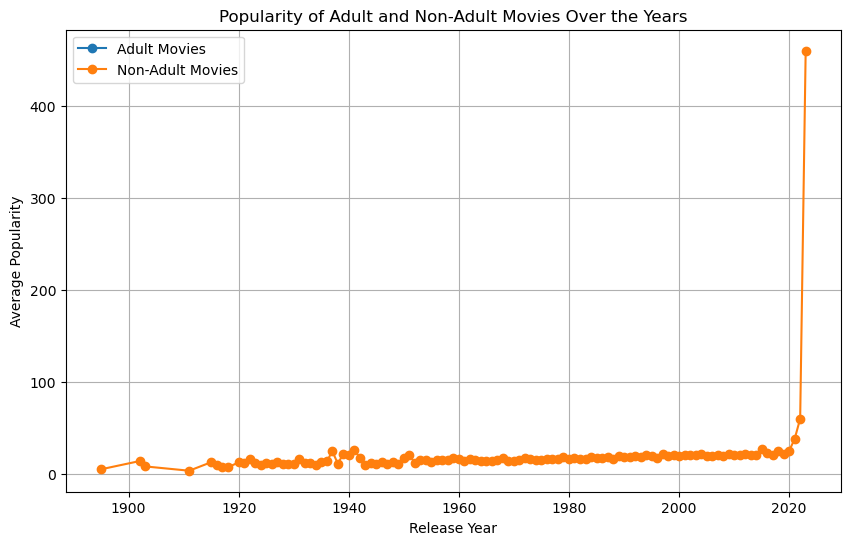

In [17]:
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year

# Filter adult and non-adult movies
adult_movies = movies[movies['adult']]
non_adult_movies = movies[~movies['adult']]

print("Adult Movies DataFrame:")
print(adult_movies)

print("Non-Adult Movies DataFrame:")
print(non_adult_movies)

# Calculate the average popularity of adult and non-adult movies for each release year
adult_movies_popularity = adult_movies.groupby('release_year')['popularity'].mean()
non_adult_movies_popularity = non_adult_movies.groupby('release_year')['popularity'].mean()

# Plot the popularity of adult and non-adult movies over the years
plt.figure(figsize=(10, 6))
plt.plot(adult_movies_popularity.index, adult_movies_popularity, marker='o', label='Adult Movies')
plt.plot(non_adult_movies_popularity.index, non_adult_movies_popularity, marker='o', label='Non-Adult Movies')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.title('Popularity of Adult and Non-Adult Movies Over the Years')
plt.grid(True)
plt.legend()
plt.show()

# the issue here is that the adult column is only having false values...sheesh...

In [18]:
movies   # delete this

,Unnamed: 0,id,title,original_language,release_date,vote_average,popularity,adult,release_year
0,0,238,The Godfather,en,1972-03-14,8.7,114.574,False,1972
1,1,278,The Shawshank Redemption,en,1994-09-23,8.7,91.998,False,1994
2,2,240,The Godfather Part II,en,1974-12-20,8.6,61.490,False,1974
3,3,19404,Dilwale Dulhania Le Jayenge,hi,1995-10-20,8.6,28.989,False,1995
4,4,424,Schindler's List,en,1993-12-15,8.6,43.764,False,1993
...,...,...,...,...,...,...,...,...,...
19995,19995,384521,The Cloverfield Paradox,en,2018-02-04,5.6,17.073,False,2018
19996,19996,14361,Captain Ron,en,1992-09-18,5.6,11.060,False,1992
19997,19997,11637,Are We There Yet?,en,2005-01-20,5.6,15.591,False,2005
19998,19998,10956,Joe Dirt,en,2001-04-10,5.6,15.664,False,2001


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = movies.copy()

# Step 1: Encode Categorical Features using One-Hot Encoding
df = pd.get_dummies(df, columns=['original_language'])

# Step 2: Drop Irrelevant Columns
df = df.drop(['Unnamed: 0', 'id', 'title', 'release_date'], axis=1)

# Separate features (X) and target (y)
X = df.drop(['popularity', 'vote_average'], axis=1)  # Use 'popularity' or 'vote_average' as target
y = df['popularity']  # Use 'popularity' or 'vote_average' as target

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score and Mean Squared Error of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R-squared score: 0.01
Mean Squared Error: 8018.67


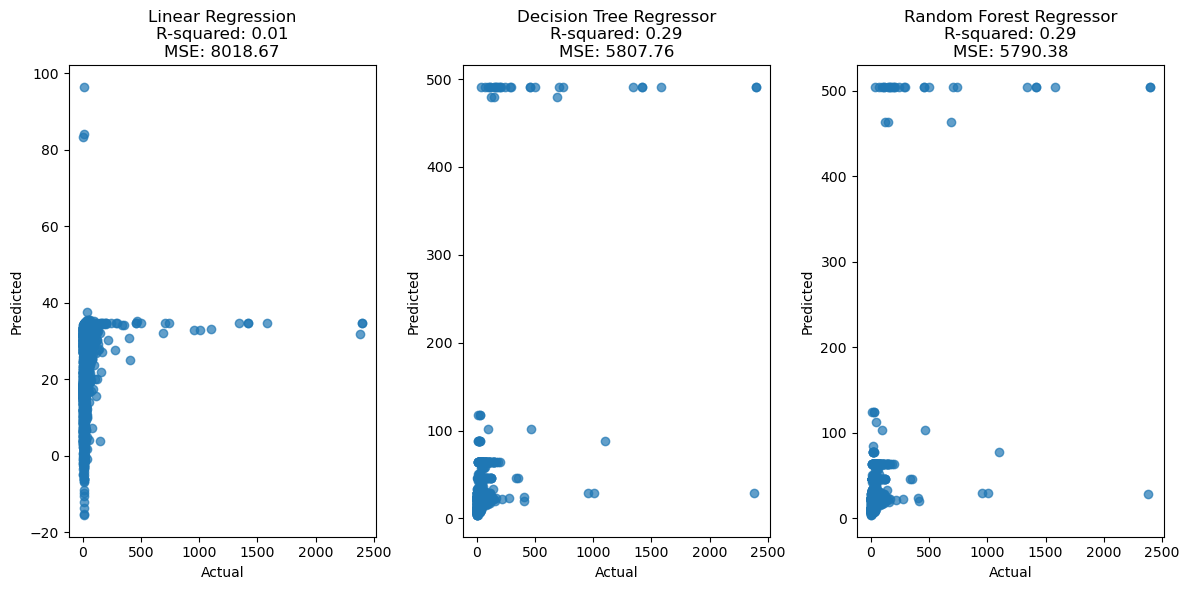

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

df = movies.copy()

# Step 1: Encode Categorical Features using One-Hot Encoding
df = pd.get_dummies(df, columns=['original_language'])

# Step 2: Drop Irrelevant Columns
df = df.drop(['Unnamed: 0', 'id', 'title', 'release_date'], axis=1)

# Separate features (X) and target (y)
X = df.drop(['popularity', 'vote_average'], axis=1)
y = df['popularity']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set for all models
linear_pred = linear_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calculate R-squared scores and Mean Squared Errors
linear_r2 = r2_score(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
tree_r2 = r2_score(y_test, tree_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

# Plot the actual vs. predicted values for each model
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Linear Regression\nR-squared: {linear_r2:.2f}\nMSE: {linear_mse:.2f}')

plt.subplot(1, 3, 2)
plt.scatter(y_test, tree_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Decision Tree Regressor\nR-squared: {tree_r2:.2f}\nMSE: {tree_mse:.2f}')

plt.subplot(1, 3, 3)
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Random Forest Regressor\nR-squared: {rf_r2:.2f}\nMSE: {rf_mse:.2f}')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

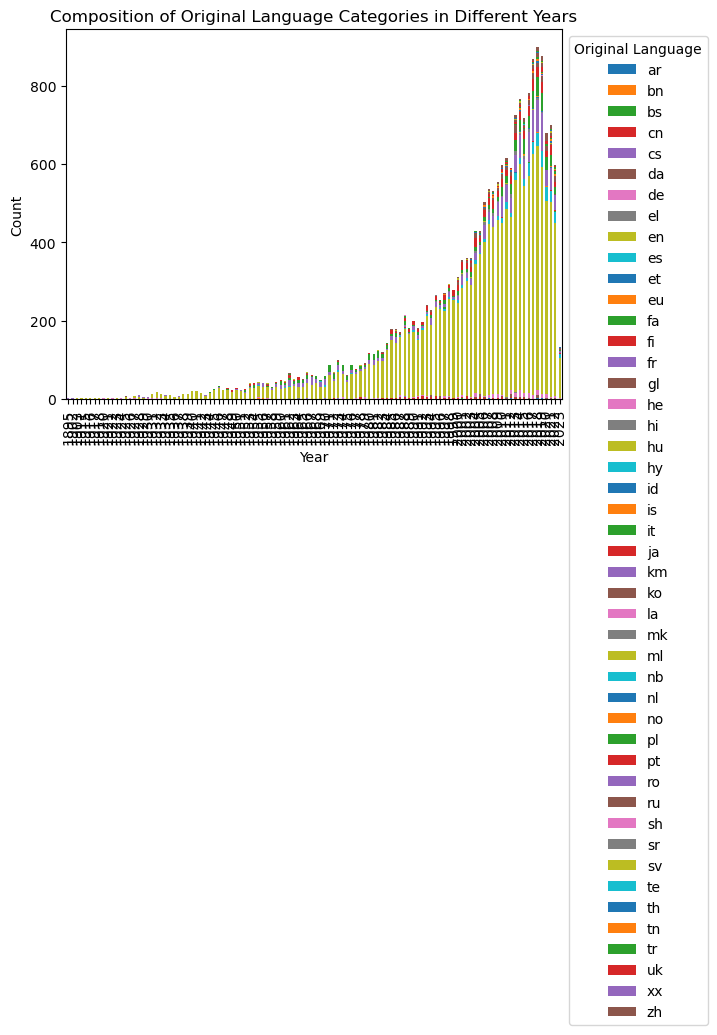

In [21]:
# Stacked Bar Chart: Composition of Original Language Categories in Different Years
language_year_counts = movies.groupby(['release_year', 'original_language']).size().unstack()
plt.figure(figsize=(12, 8))
language_year_counts.plot(kind='bar', stacked=True)
plt.title('Composition of Original Language Categories in Different Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Original Language', bbox_to_anchor=(1, 1))
plt.show()

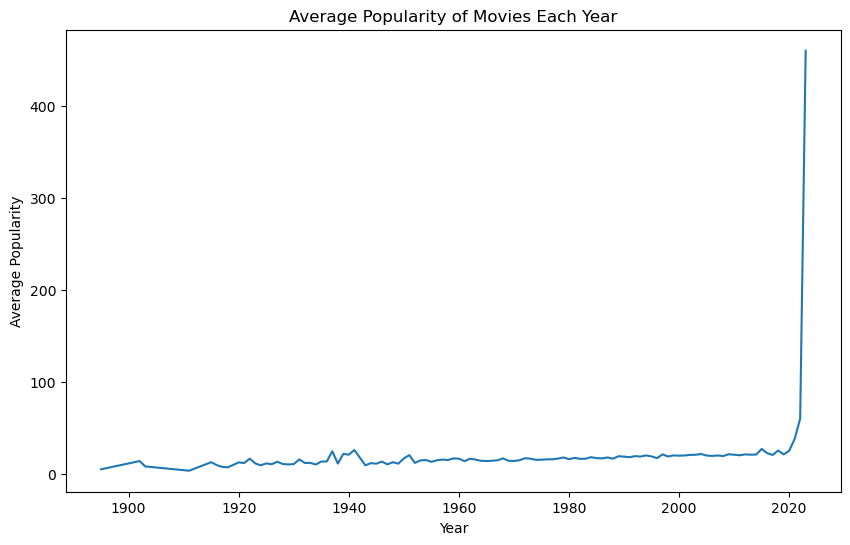

In [22]:
# Time Series Plot: Average Popularity of Movies Each Year
average_popularity_year = movies.groupby('release_year')['popularity'].mean()
plt.figure(figsize=(10, 6))
average_popularity_year.plot()
plt.title('Average Popularity of Movies Each Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()

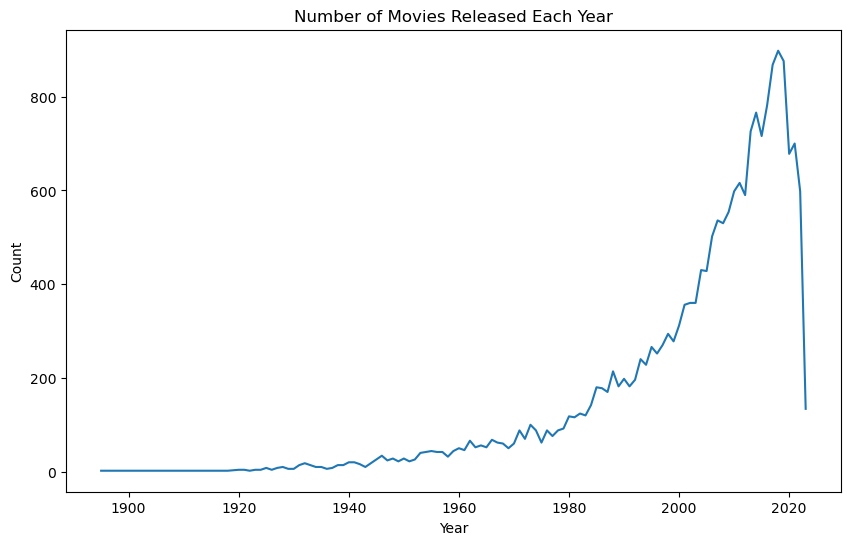

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the DataFrame into 'movies'
# I'll create a copy of the DataFrame to avoid modifying the original data
df = movies.copy()

# Convert 'release_date' column to datetime type
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the release year from the 'release_date' column
df['release_year'] = df['release_date'].dt.year

# Group the movies by release year and count the number of movies in each year
yearly_counts = df['release_year'].value_counts().sort_index()

# Data Visualization: Line Plot for Release Year Counts
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()
